In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import subprocess

#SKlearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from datetime import datetime

In [3]:
# Read Data
data = pd.read_csv('/Users/gaochang/Desktop/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
# Check for Missing Value
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

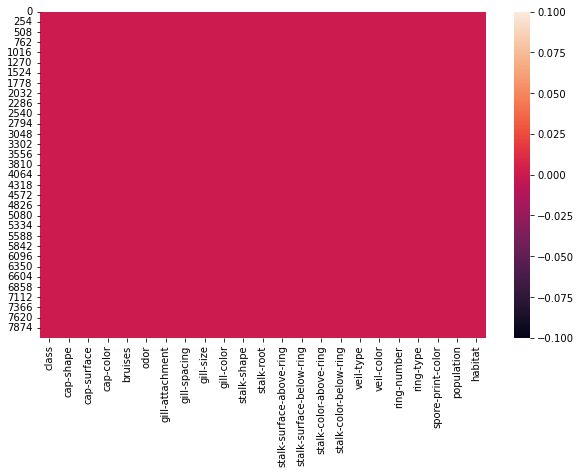

In [6]:
# Missing Value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

# Explanatory Descriptive Analysis

In [7]:
#Basic stats descriptive statistics
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

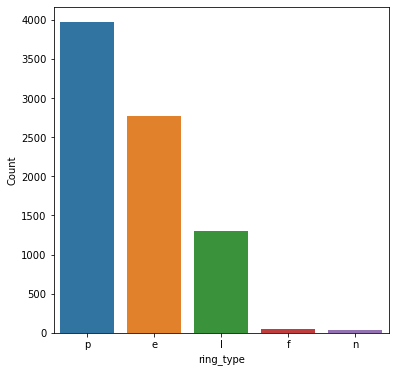

In [8]:
# Ring Type
# poisonous class ring_type components
plt.figure(figsize=(6,6))
df_p = data[data['class']=='p']
sns.countplot(data['ring-type'])
plt.xlabel('ring_type')
plt.ylabel('Count')

<AxesSubplot:title={'center':'Poisonous class ring_type components'}, ylabel='ring-type'>

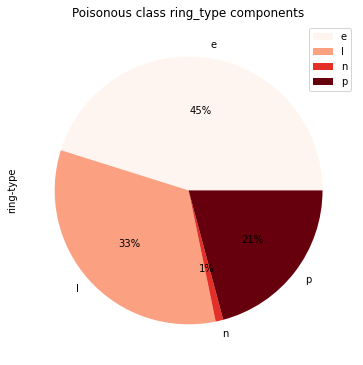

In [9]:
df_p['ring-type'].value_counts().sort_index().plot.pie(title = "Poisonous class ring_type components",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

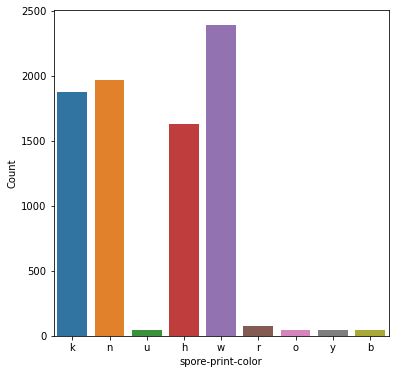

In [10]:
# spore-print-color  
plt.figure(figsize=(6,6))
df_p = data[data['class']=='p']
sns.countplot(data['spore-print-color'])
plt.xlabel('spore-print-color')
plt.ylabel('Count')

<AxesSubplot:title={'center':'Poisonous class spore-print-color'}, ylabel='spore-print-color'>

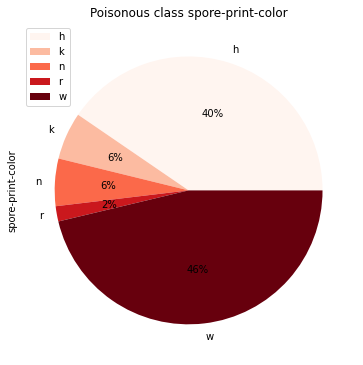

In [11]:
df_p['spore-print-color'].value_counts().sort_index().plot.pie(title = "Poisonous class spore-print-color",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))




/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

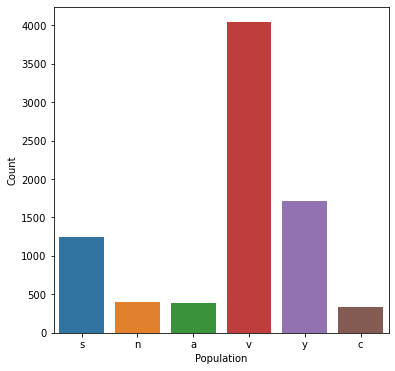

In [12]:
# population
plt.figure(figsize=(6,6))
df_p = data[data['class']=='p']
sns.countplot(data['population'])
plt.xlabel('Population')
plt.ylabel('Count')

<AxesSubplot:title={'center':'Poisonous class population'}, ylabel='population'>

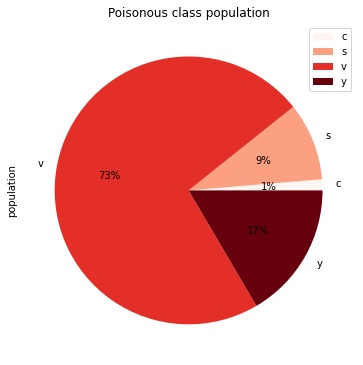

In [13]:
df_p['population'].value_counts().sort_index().plot.pie(title = "Poisonous class population",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

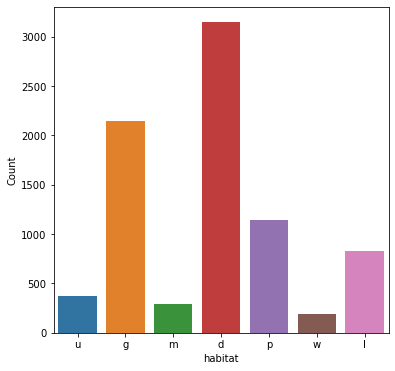

In [14]:
# habitat
plt.figure(figsize=(6,6))
df_p = data[data['class']=='p']
sns.countplot(data['habitat'])
plt.xlabel('habitat')
plt.ylabel('Count')

<AxesSubplot:title={'center':'Poisonous class habitat'}, ylabel='habitat'>

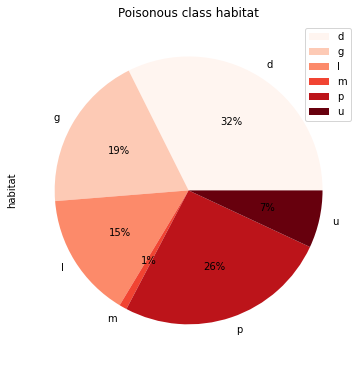

In [15]:
df_p['habitat'].value_counts().sort_index().plot.pie(title = "Poisonous class habitat",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))

### Clustering
For Categorical Data:
https://joydipnath.medium.com/clustering-technique-for-categorical-data-in-python-8eb0f581b6f9
https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/ 



In [16]:
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

In [31]:
X = data.drop('class', axis = 1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 74778.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1142, cost: 63155.0
Run 1, iteration: 2/100, moves: 290, cost: 63155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 883, cost: 69217.0
Run 2, iteration: 2

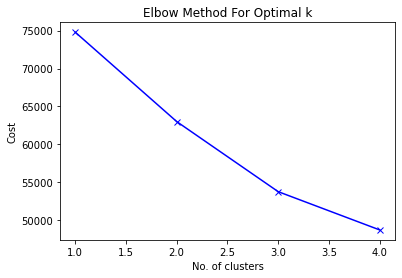

In [20]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1656, cost: 54477.0
Run 1, iteration: 2/100, moves: 887, cost: 53736.0
Run 1, iteration: 3/100, moves: 325, cost: 53736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3206, cost: 56533.0
Run 2, iteration: 2/100, moves: 505, cost: 56465.0
Run 2, iteration: 3/100, moves: 14, cost: 56465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1215, cost: 58523.0
Run 3, iteration: 2/100, moves: 247, cost: 58356.0
Run 3, iteration: 3/100, moves: 719, cost: 56824.0
Run 3, iteration: 4/100, moves: 618, cost: 56824.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2002, cost: 60073.0
Run 4, iteration: 2/100, moves: 1496, cost: 54530.0
Run 4, iteration: 3/100, moves: 763, cost: 54151.0
Run 4, iterat

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [22]:
X.insert(0, "Cluster", clusters, True)
X

,Cluster,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,1,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,1,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


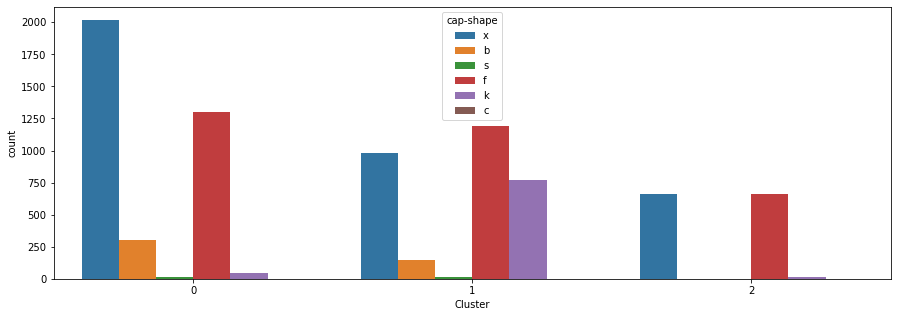

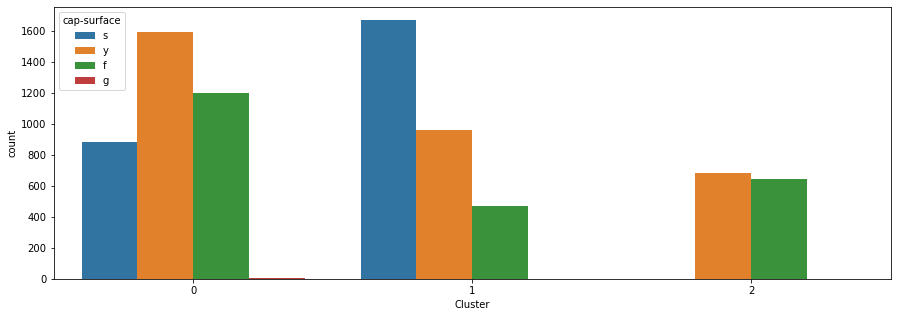

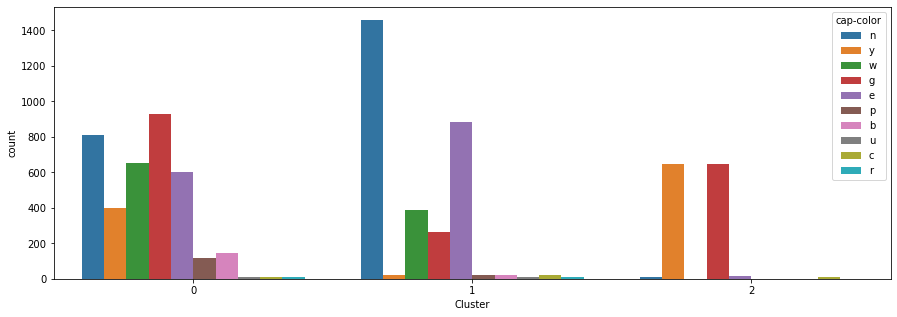

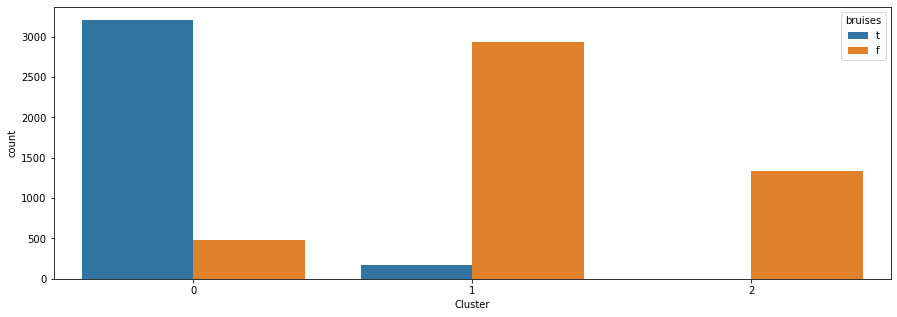

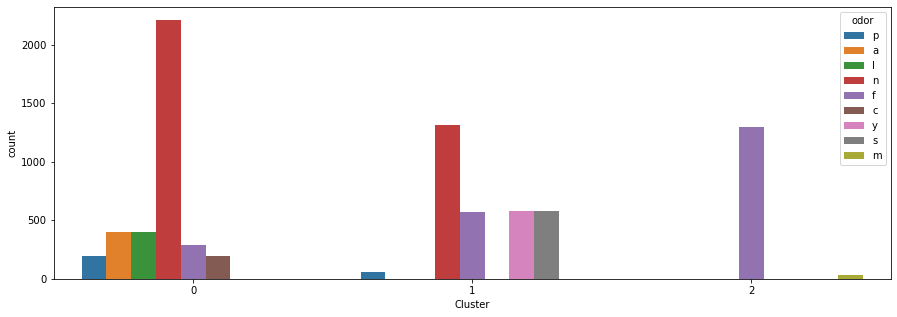

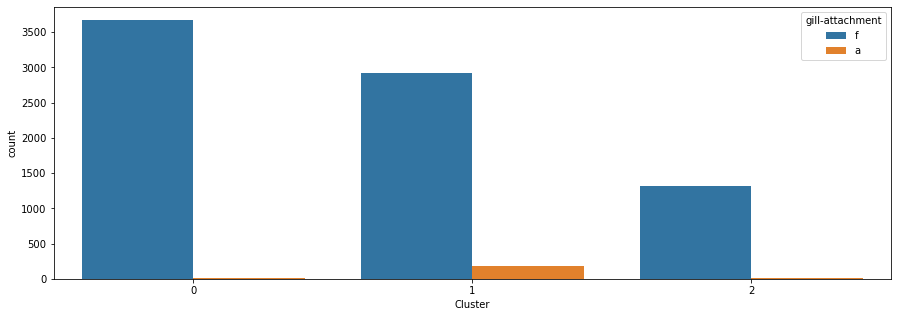

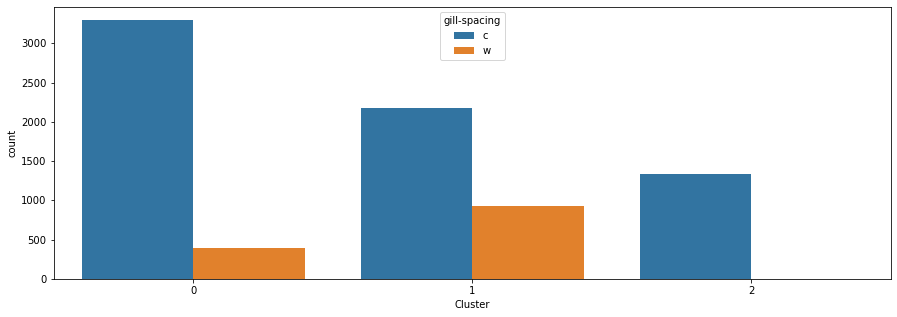

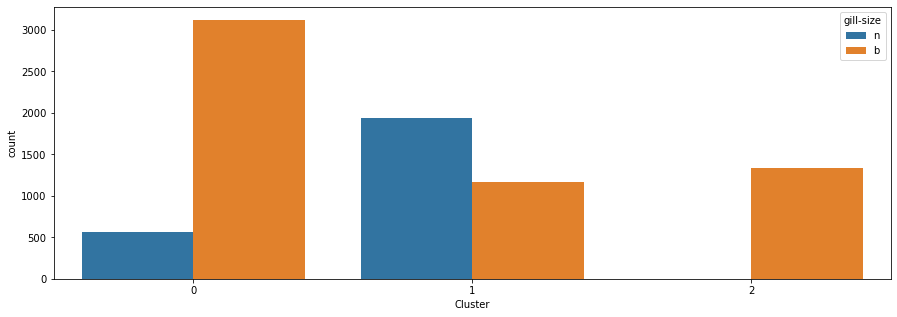

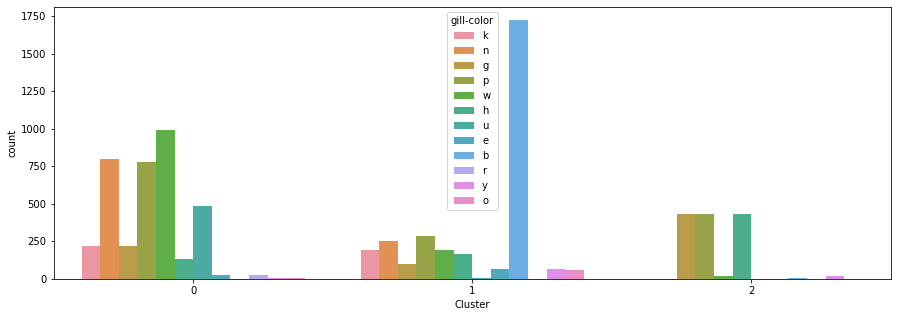

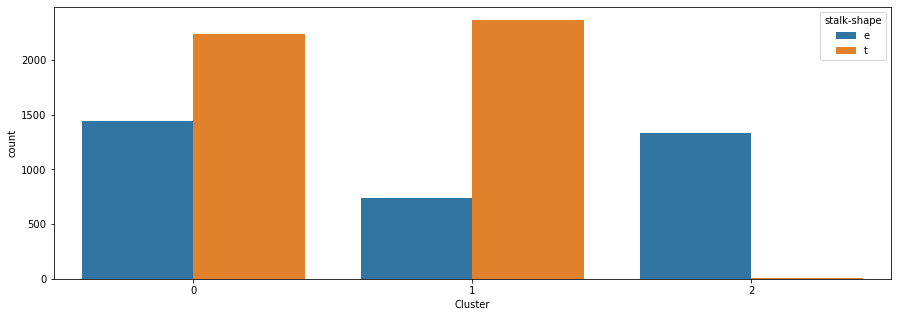

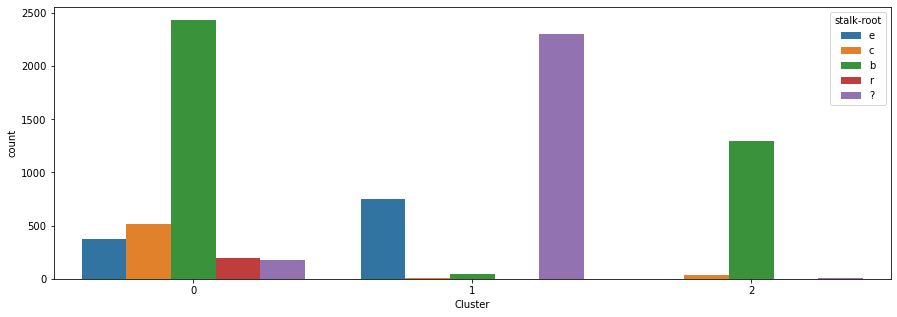

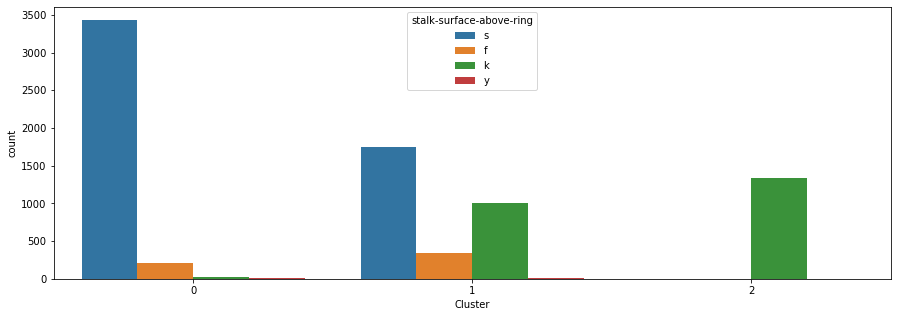

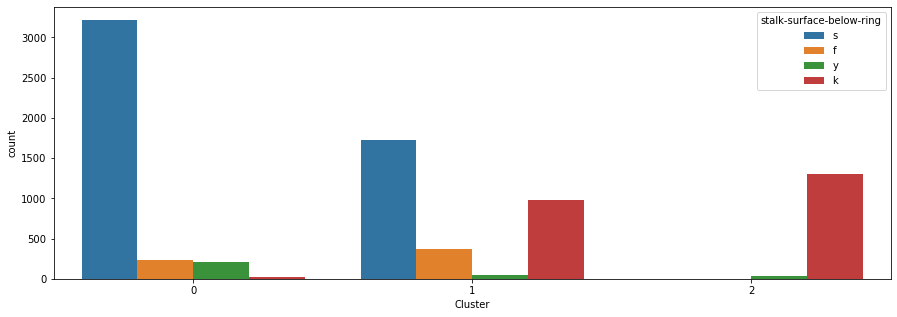

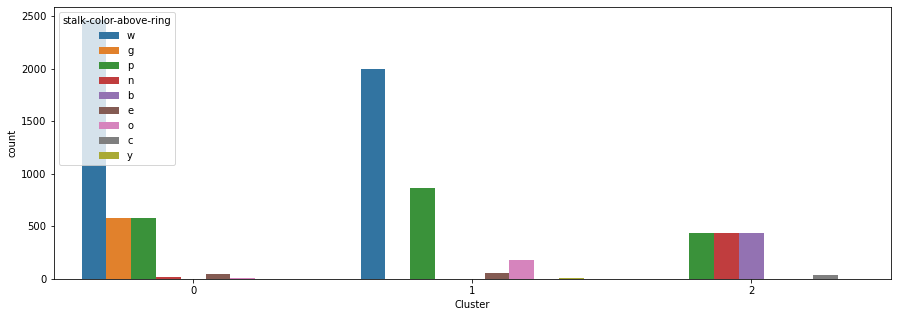

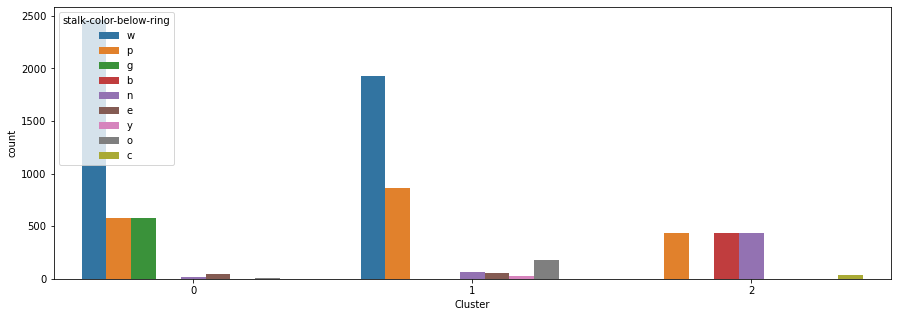

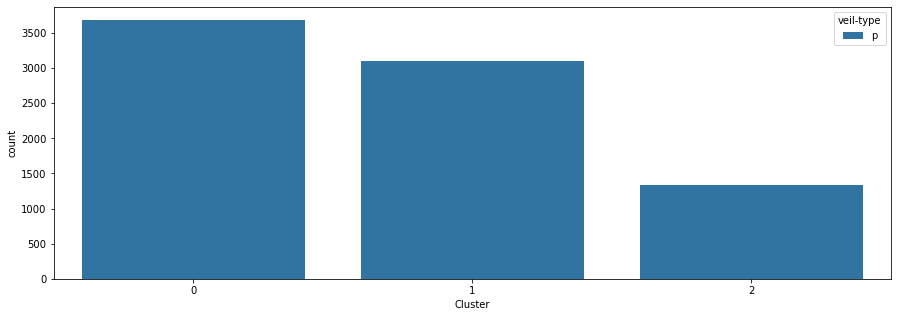

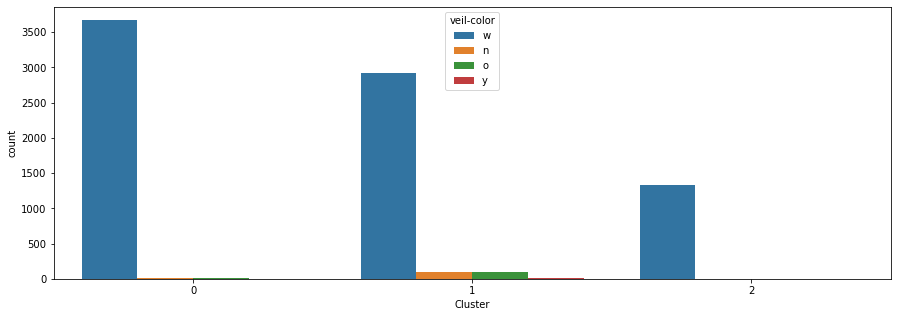

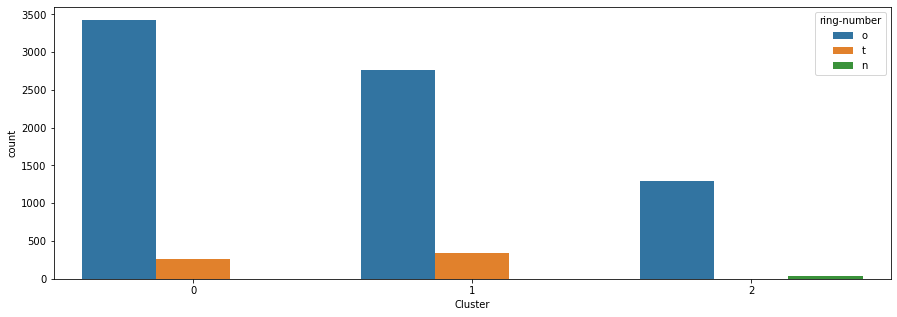

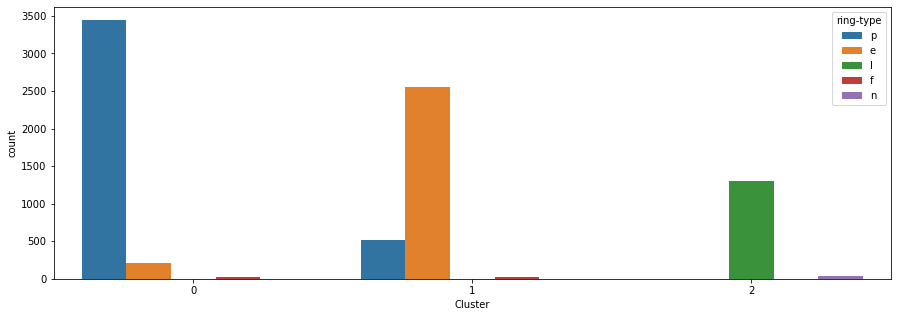

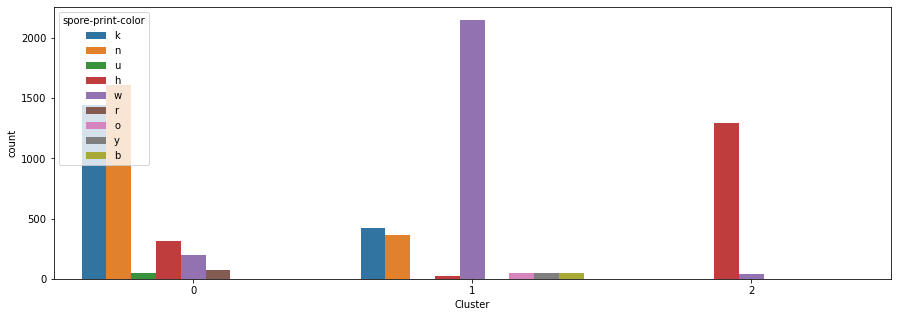

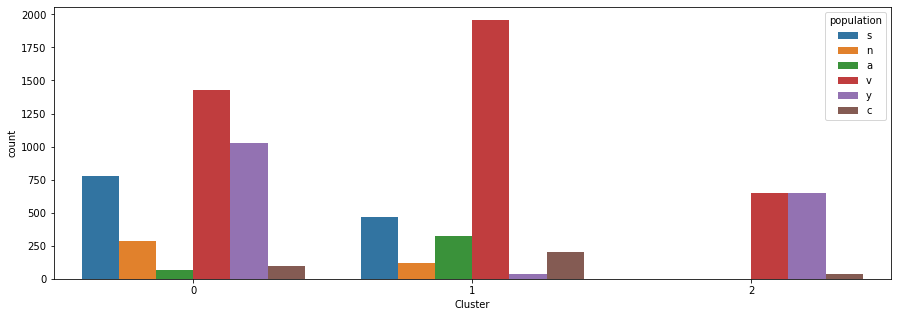

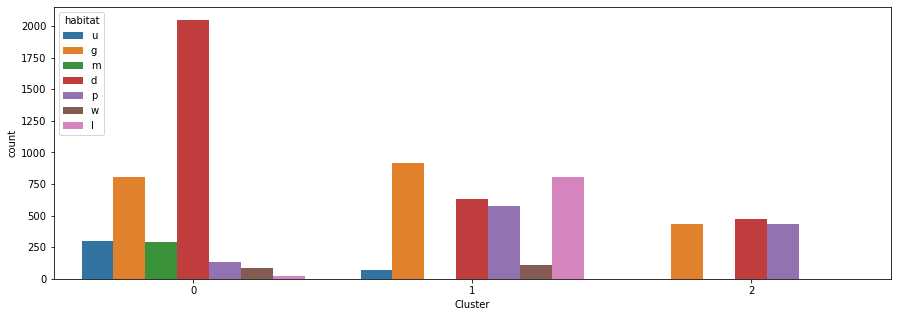

In [23]:
# Plot clustering result by features
all_features = ['cap-shape', 'cap-surface', 'cap-color',
       'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = X)
    plt.show()

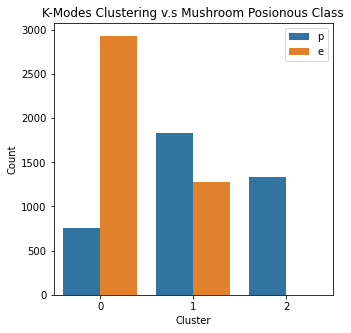

In [27]:
cc = pd.DataFrame({'Class': data['class'], 'Cluster':X['Cluster']})
plt.subplots(figsize = (5,5))
sns.countplot(x='Cluster',hue='Class', data = cc)
plt.title('K-Modes Clustering v.s Mushroom Posionous Class')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

In [32]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1311, cost: 63107.0
Run 1, iteration: 2/100, moves: 323, cost: 63015.0
Run 1, iteration: 3/100, moves: 119, cost: 63015.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 850, cost: 63440.0
Run 2, iteration: 2/100, moves: 591, cost: 62619.0
Run 2, iteration: 3/100, moves: 225, cost: 62619.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 486, cost: 63968.0
Run 3, iteration: 2/100, moves: 216, cost: 63968.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1501, cost: 64780.0
Run 4, iteration: 2/100, moves: 275, cost: 64690.0
Run 4, iteration: 3/100, moves: 77, cost: 64690.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 347, c

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [33]:
X.insert(0, "Cluster", clusters, True)
X

,Cluster,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


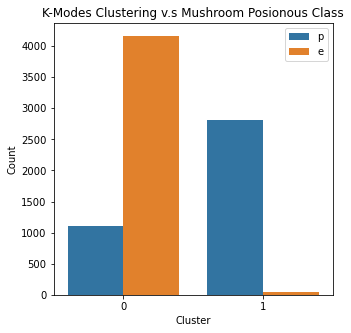

In [34]:
cc = pd.DataFrame({'Class': data['class'], 'Cluster':X['Cluster']})
plt.subplots(figsize = (5,5))
sns.countplot(x='Cluster',hue='Class', data = cc)
plt.title('K-Modes Clustering v.s Mushroom Posionous Class')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()